In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Connect SQL

In [41]:
import psycopg2

# Define connection parameters
conn = psycopg2.connect(
    host="localhost",
    user="postgres",
    password="mohammad",
    dbname="OLA",
    port="5432"  # PostgreSQL default port is 5432
)

# Create a cursor to interact with the database
cur = conn.cursor()

# Example: Run a query
cur.execute("SELECT version();")
print(cur.fetchone())

('PostgreSQL 17.0 on x86_64-windows, compiled by msvc-19.41.34120, 64-bit',)


## 1. Retrieve all successful bookings:

In [42]:
query = """select * from bookings where "Booking_Status" = 'Success'"""
cur.execute(query)
data = cur.fetchall()
successful_booking = pd.DataFrame(data, columns=['Date',
 'Time',
 'Booking_ID',
 'Booking_Status',
 'Customer_ID',
 'Vehicle_Type',
 'Pickup_Location',
 'Drop_Location',
 'V_TAT',
 'C_TAT',
 'Canceled_Rides_by_Customer',
 'Canceled_Rides_by_Driver',
 'Incomplete_Rides',
 'Incomplete_Rides_Reason',
 'Booking_Value',
 'Payment_Method',
 'Ride_Distance',
 'Driver_Ratings',
 'Customer_Rating',
 'Vehicle Images'])
successful_booking.head(3)

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,None,None,No,None,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
1,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,None,None,No,None,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,None,None,No,None,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...


## 2. Find the average ride distance for each vehicle type:

In [43]:
query = """select "Vehicle_Type" as vihicle_type,
round(avg("Ride_Distance")::numeric,2) as avg_distance
from bookings
group by "Vehicle_Type" """

cur.execute(query)
data = cur.fetchall()
avg_ride_distance = pd.DataFrame(data, columns=['vihicle_type','avg_distance'])
avg_ride_distance


,vihicle_type,avg_distance
0,Auto,6.24
1,Bike,15.53
2,eBike,15.58
3,Mini,15.51
4,Prime Plus,15.45
5,Prime Sedan,15.76
6,Prime SUV,15.27


## 3. Get the total number of cancelled rides by customers:

In [44]:
query = """ select count("Booking_Status") as cancelled_by_customer from bookings where "Booking_Status" = 'Canceled by Customer' """
cur.execute(query)
data = cur.fetchall()
print(f"Total Number of Cancelled rides by customers : {data[0][0]}")

Total Number of Cancelled rides by customers : 20998


## 4. List the top 5 customers who booked the highest number of rides:

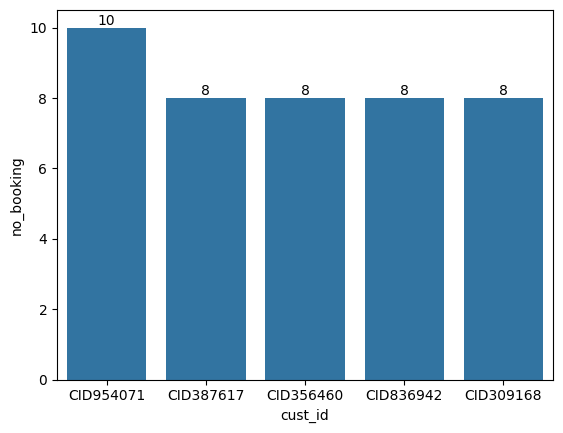

In [45]:
query = """ select "Customer_ID" as cust_id, count("Booking_ID") as booking_id from bookings
group by cust_id
order by booking_id desc limit 5 """

cur.execute(query)
data = cur.fetchall()
highest_cust = pd.DataFrame(data,columns=['cust_id','no_booking'])
ax = sns.barplot(data=highest_cust,x='cust_id',y='no_booking')
for col in ax.containers:
    ax.bar_label(col)


## 5. Get the number of rides cancelled by drivers due to personal and car-related issues:

In [46]:
query = """ select count(*) as cancelled_by_drivers from bookings
where "Canceled_Rides_by_Driver" = 'Personal & Car related issue' """
cur.execute(query)
data = cur.fetchall()
print(f"Total Number of Cancelled rides by drivers : {data[0][0]}")

Total Number of Cancelled rides by drivers : 13084


##  6. Find the maximum and minimum driver ratings for Prime Sedan bookings:

In [47]:
query = """ select max("Driver_Ratings"),min("Driver_Ratings") from bookings where "Vehicle_Type" = 'Prime Sedan' """
cur.execute(query)
data = cur.fetchall()
Prime_Sedan = pd.DataFrame(data, columns=['Max_Rating', 'Min_Rating'])
Prime_Sedan

,Max_Rating,Min_Rating
0,5.0,3.0


## 7. Retrieve all rides where payment was made using UPI:

In [48]:
query = """ select * from UPI_payment;
"""
cur.execute(query)
data = cur.fetchall()
upi_pay = pd.DataFrame(data, columns=['Date',
 'Time',
 'Booking_ID',
 'Booking_Status',
 'Customer_ID',
 'Vehicle_Type',
 'Pickup_Location',
 'Drop_Location',
 'V_TAT',
 'C_TAT',
 'Canceled_Rides_by_Customer',
 'Canceled_Rides_by_Driver',
 'Incomplete_Rides',
 'Incomplete_Rides_Reason',
 'Booking_Value',
 'Payment_Method',
 'Ride_Distance',
 'Driver_Ratings',
 'Customer_Rating',
 'Vehicle Images'])
upi_pay.head(3)

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,None,None,No,None,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
1,2024-07-13 04:42:00,04:42:00,CNR8787177882,Success,CID802429,Mini,Kadugodi,Vijayanagar,231.0,90.0,None,None,No,None,173,UPI,41,3.4,4.6,https://cdn-icons-png.flaticon.com/128/3202/32...
2,2024-07-27 13:18:00,13:18:00,CNR4524472111,Success,CID540929,Auto,Cox Town,Yelahanka,126.0,35.0,None,None,No,None,330,UPI,8,3.0,4.8,https://cdn-icons-png.flaticon.com/128/16526/1...


## 8. Find the average customer rating per vehicle type:

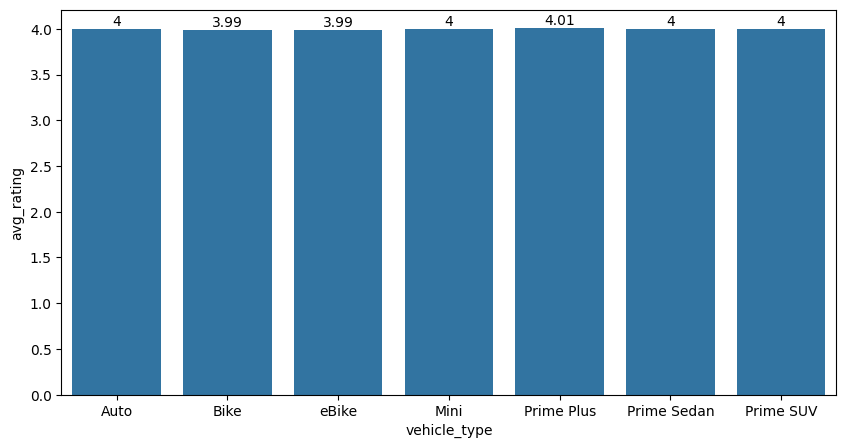

In [54]:
query = """select "Vehicle_Type", round(avg("Customer_Rating")::numeric,2) as cust_rating from bookings
group by "Vehicle_Type"
"""
cur.execute(query)
data = cur.fetchall()
avg_rating = pd.DataFrame(data,columns=['vehicle_type','avg_rating'])
plt.figure(figsize=(10,5))
ax = sns.barplot(data=avg_rating,y='avg_rating',x='vehicle_type')
for col in ax.containers:
    ax.bar_label(col)

## 9. Calculate the total booking value of rides completed successfully:

In [55]:
query = """select sum("Booking_Value") from successful_booking"""
cur.execute(query)
data = cur.fetchall()
print(f"Total booking value: {data[0][0]}")

Total booking value: 70160934


## 10. List all incomplete rides along with the reason:

In [56]:
query = """select * from  all_incomplete_rides"""
cur.execute(query)
data = cur.fetchall()
incomplete_rides = pd.DataFrame(data, columns=['Booking_id','Incomplete_rides_reasons'])
incomplete_rides



,Booking_id,Incomplete_rides_reasons
0,CNR5837509618,Vehicle Breakdown
1,CNR4865399468,Vehicle Breakdown
2,CNR9358327485,Vehicle Breakdown
3,CNR8842400080,Vehicle Breakdown
4,CNR6389750655,Customer Demand
...,...,...
3921,CNR5736603986,Other Issue
3922,CNR7606539545,Vehicle Breakdown
3923,CNR2988966473,Vehicle Breakdown
3924,CNR7028327052,Customer Demand
